# Random Forest

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/house_prices.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/house_prices.parquet')

In [3]:
y_train = train.SalePrice
X_train = train.drop(columns=['SalePrice'])

In [4]:
y_validation = validation.SalePrice
X_validation = validation.drop(columns=['SalePrice'])

In [5]:
y_train_scaled = y_train/1000
y_validation_scaled = y_validation/1000

In [7]:
exploratory_depths = [1, 10, 20, 30, 40]
exploratory_estimators = [5, 10, 20, 30, 50, 60]

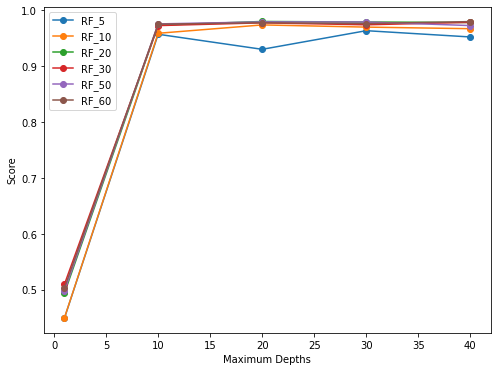

In [13]:
plt.figure(figsize=(8, 6))

for n in exploratory_estimators:
    plt.plot(exploratory_depths, [RandomForestRegressor(n_estimators=n, max_depth=i).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='RF_'+str(n))
    
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.legend()
plt.show()

In [31]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 17, 20, 22, 25]
n_estimators = [1, 5, 10, 15, 20, 25, 30]

In [32]:
models_list = []
names_list = []
for n in n_estimators:
    for i in max_depth:
        models_list.append(RandomForestRegressor(n_estimators=n, max_depth=i))
        names_list.append('RF_'+str(n)+'_'+str(i))

In [33]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/house_prices/random_forest.csv', X_train, y_train_scaled, X_validation, y_validation_scaled, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
RF_1_1,0.026954,60.164347,61.555656,2.312514
RF_1_3,0.024929,43.718720,47.550681,8.765036
RF_1_5,0.028933,33.075820,44.926575,35.829061
RF_1_7,0.035903,28.479468,42.185200,48.124958
RF_1_10,0.041399,27.860456,53.017619,90.297025
...,...,...,...,...
RF_30_15,0.989206,12.568469,31.113739,147.553926
RF_30_17,0.982400,12.457179,29.487307,136.709339
RF_30_20,0.981764,13.249489,29.814191,125.021439
RF_30_22,1.034036,11.105563,29.387379,164.618552


In [34]:
metrics[metrics['delta%']<20].sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
RF_10_3,0.088063,35.581693,37.397931,5.104419
RF_15_3,0.133643,35.352964,39.009744,10.343628
RF_25_3,0.234370,34.890646,39.382291,12.873494
RF_30_3,0.228924,35.546969,39.546837,11.252345
RF_5_3,0.050864,36.131738,39.891316,10.405194
RF_20_3,0.156758,34.536992,39.923361,15.595941
RF_1_3,0.024929,43.718720,47.550681,8.765036
RF_5_1,0.029920,54.405731,56.109751,3.132059
RF_20_1,0.076489,55.303253,57.276426,3.567914
RF_15_1,0.067845,55.545400,57.580817,3.664420


Then, we continue with **RF_10_3**.

In [6]:
test =  pd.read_parquet('../../../data/model_input/test_sets/house_prices.parquet')

In [7]:
y_test = test.SalePrice
X_test = test.drop(columns=['SalePrice'])

In [8]:
retrain = pd.concat([train, validation])

In [9]:
y_retrain = retrain.SalePrice
X_retrain = retrain.drop(columns=['SalePrice'])

In [10]:
y_retrain_scaled = y_retrain/1000
y_test_scaled = y_test/1000

In [35]:
model = RandomForestRegressor(n_estimators=10, max_depth=3).fit(X_retrain, y_retrain_scaled)

In [36]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test_scaled, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 37.9263


It performs as expected

In [37]:
dump(model, '../../../data/model_output/models/house_prices/best_random_forest.joblib')

['best_random_forest.joblib']

In [38]:
with open('../../../data/model_output/metrics/house_prices/final_RMSE.txt', 'a') as f:
    f.write('\nRF, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_6516/3867665254.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],


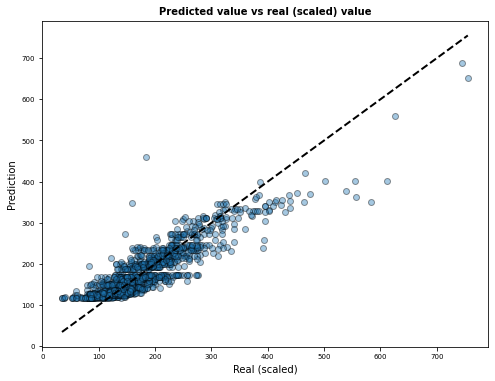

In [39]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain_scaled

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain_scaled, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real (scaled) value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real (scaled)')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)

In [11]:
from joblib import load
load_mod = load('../../../data/model_output/models/house_prices/best_random_forest.joblib')

train_pred = load_mod.predict(X_retrain)
rmse_train = root_mean_squared_error(y_retrain_scaled, train_pred)
test_pred = load_mod.predict(X_test)
rmse_test = root_mean_squared_error(y_test_scaled, test_pred)

In [12]:
import time 
time1 = time.time()
RandomForestRegressor(n_estimators=10, max_depth=3).fit(X_retrain, y_retrain_scaled)
time2 = time.time() - time1 

with open('../../../data/model_output/metrics/house_prices/final_metrics.txt', 'a') as f:
     f.write(f'\nRF; {time2}; {rmse_train}; {rmse_test}')